> 간단한 EDA를 통해 데이터를 살펴보는 시간이었으면 좋겠습니다. 추가로 캠퍼분들이 궁금해하는 내용들을 직접 확인해보는 시간이 되기를 바랍니다.

# 0. 라이브러리 / 기본셋업

In [1]:
# !pip install python==3.10.12
# !pip install numpy==1.26.0
# !pip install pandas==2.1.1
# !pip install matplotlib==3.8.1
# !pip install seaborn==0.13.0
# !pip install missingno

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import missingno as msno

from tqdm import tqdm

버전 확인

- `python` >= 3.10.12
- `numpy` >= 1.26.0
- `pandas` >= 2.1.1
- `matplotlib` >= 3.8.1
- `seaborn` >= 0.13.0
- `missingno` >= 0.5.2

In [3]:
import sys, matplotlib

print("="*5 ,"나의 라이브러리 버전 확인", "="*5)
print(f"{'python version':15s} <> {sys.version}")
print(f"{'numpy version':15s} <> {np.__version__}")
print(f"{'pandas version':15s} <> {pd.__version__}")
print(f"{'matplotlib version':15s} <> {matplotlib.__version__}")
print(f"{'seaborn version':15s} <> {sns.__version__}")
print(f"{'missingno version':15s} <> {msno.__version__}")

===== 나의 라이브러리 버전 확인 =====
python version  <> 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
numpy version   <> 1.26.0
pandas version  <> 2.1.1
matplotlib version <> 3.8.1
seaborn version <> 0.13.0
missingno version <> 0.5.2


In [4]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}

# 데이터 경로 맞춰주세요!
# 혹시 코랩환경을 사용하신다면 왼쪽 폴더모양 아이콘을 눌러 "train_data.csv"를 드래그&드롭으로 업로드한 후 사용해주세요
DATA_PATH = './train_data.csv'
df = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
df = df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

CPU times: total: 2.11 s
Wall time: 2.99 s


In [5]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225


In [7]:
df[df['userID']==726]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
516746,726,A060001001,A060000001,1,2020-01-28 06:47:11,7224
516747,726,A060001002,A060000001,1,2020-01-28 06:47:16,7225
516748,726,A060001003,A060000001,1,2020-01-28 06:47:31,7225
516749,726,A060001004,A060000001,1,2020-01-28 06:48:06,7225
516750,726,A060001005,A060000001,1,2020-01-28 06:48:18,7225
...,...,...,...,...,...,...
517962,726,A010191001,A010000191,1,2020-10-25 09:59:11,7815
517963,726,A010191002,A010000191,1,2020-10-25 10:00:35,7815
517964,726,A010191003,A010000191,1,2020-10-25 10:04:34,7815
517965,726,A010191004,A010000191,1,2020-10-25 10:06:06,7815


In [8]:
df[df['KnowledgeTag'].isna()]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag


In [39]:
# check = df.groupby(['assessmentItemID','KnowledgeTag'])['KnowledgeTag'].agg('count')
# check.to_csv('./check.csv')

## 1.1 기본적인 내용 파악

### (박승아) 시험지 앞에서 두 번째 숫자로 분류

In [9]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [10]:
df['testId_group']=df['testId'].apply(lambda x: x[2])
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testId_group
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6
...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4


In [11]:
df['testId_group'].value_counts().sort_index()

testId_group
1    272082
2    268327
3    273762
4    267323
5    275773
6    264434
7    279164
8    246336
9    119385
Name: count, dtype: int64

In [12]:
def percentile(s):
    return np.sum(s) / len(s)

In [13]:
testId_grouped = df.groupby('testId_group').agg({'answerCode': percentile})
testId_grouped

,answerCode
testId_group,
1,0.800876
2,0.737593
3,0.702238
4,0.684056
5,0.658208
6,0.709232
7,0.521876
8,0.502598
9,0.449948


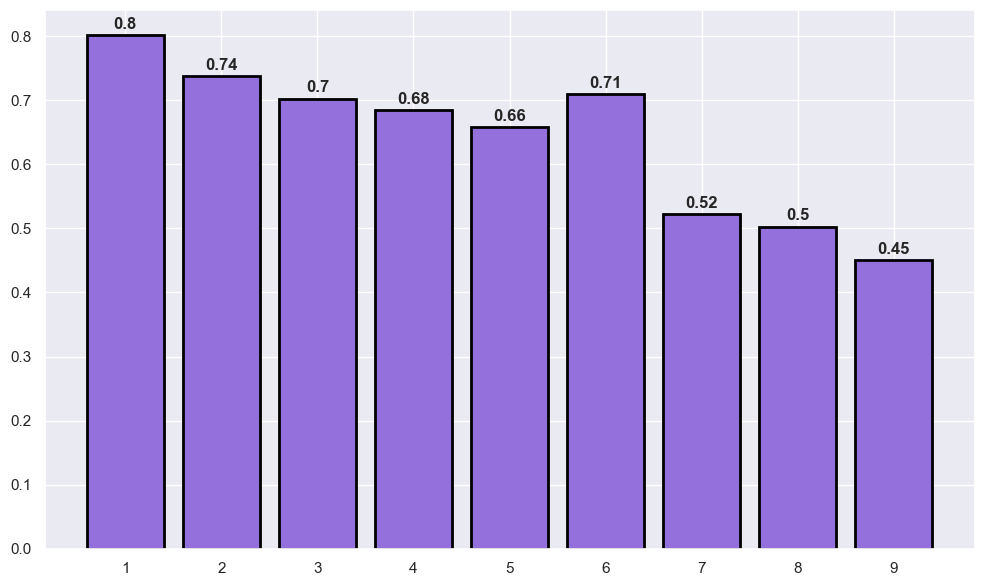

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

ax.bar(testId_grouped.index, testId_grouped['answerCode'], color='mediumpurple',
      edgecolor='black',linewidth=2)

for idx, value in zip(testId_grouped.index, testId_grouped['answerCode']):
    ax.text(idx, value+0.01, s=round(value,2),
                 ha='center',
                 fontweight='bold'
                )

plt.show()
# 'testId'의 2번째 숫자 기준 분류

### (박승아) KnowledgeTag 확인

In [15]:
df['KnowledgeTag'].nunique()

912

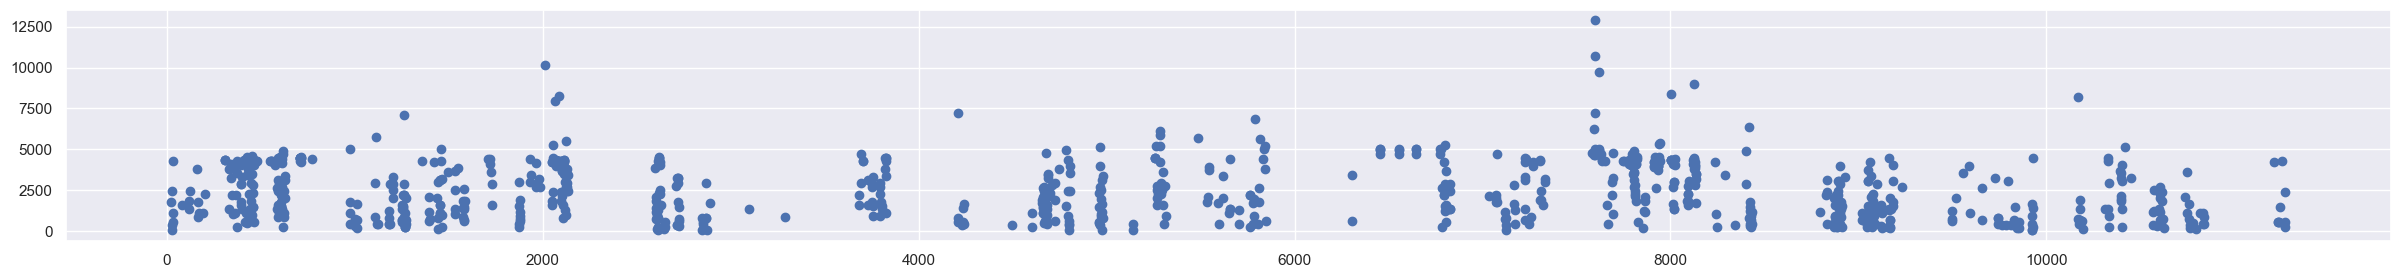

In [16]:
plt.figure(figsize=(30, 3))
plt.scatter(df['KnowledgeTag'].value_counts().index, df['KnowledgeTag'].value_counts())

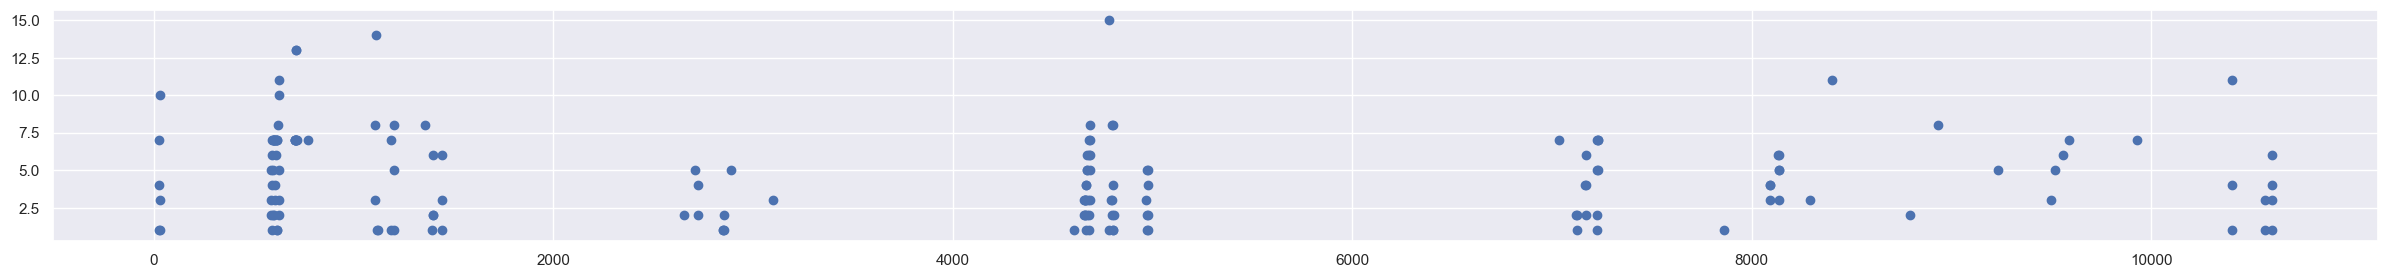

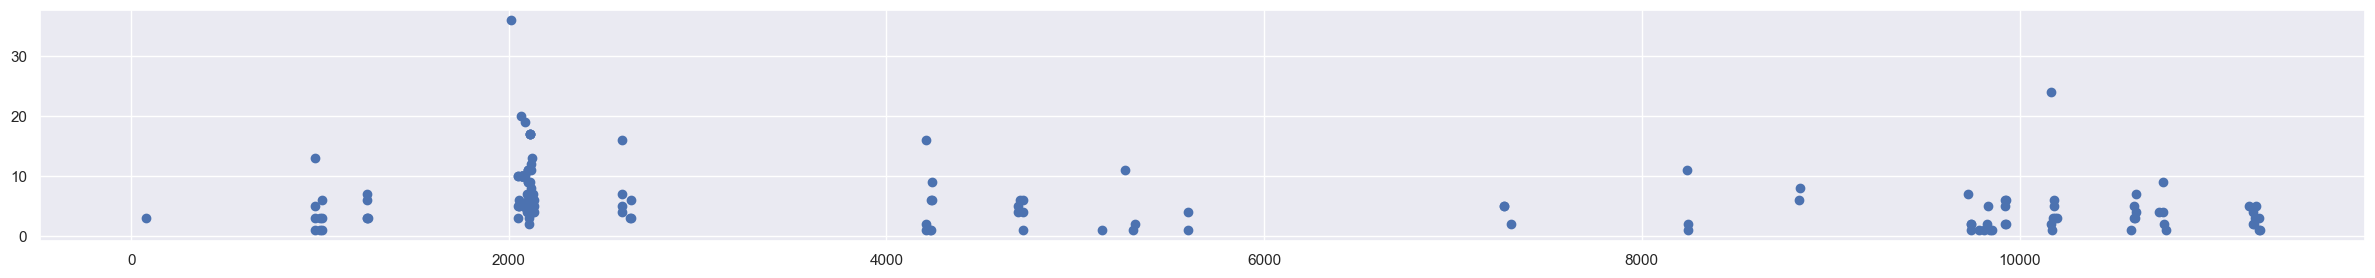

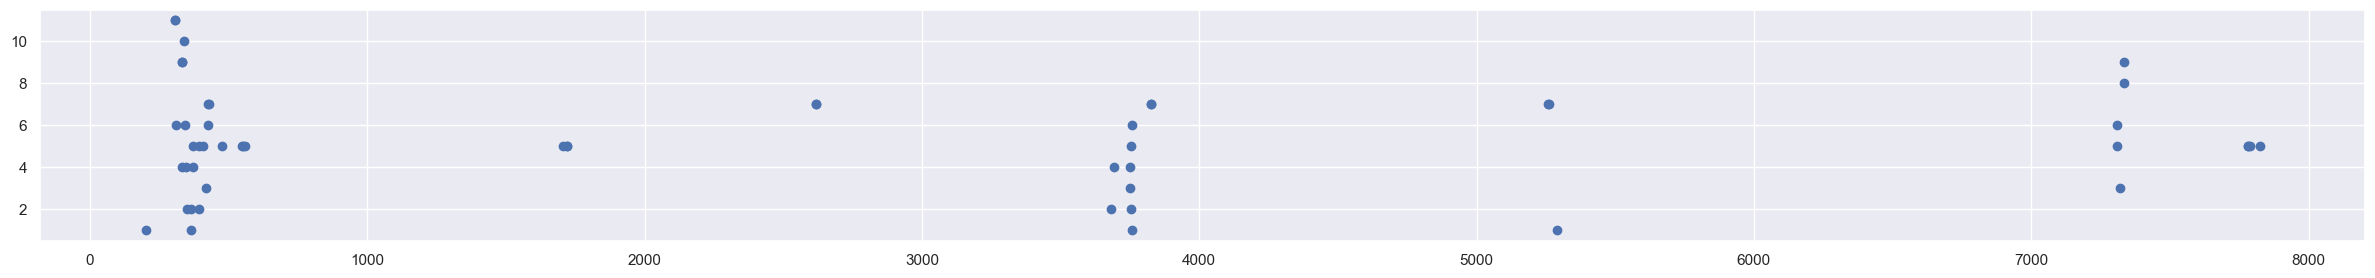

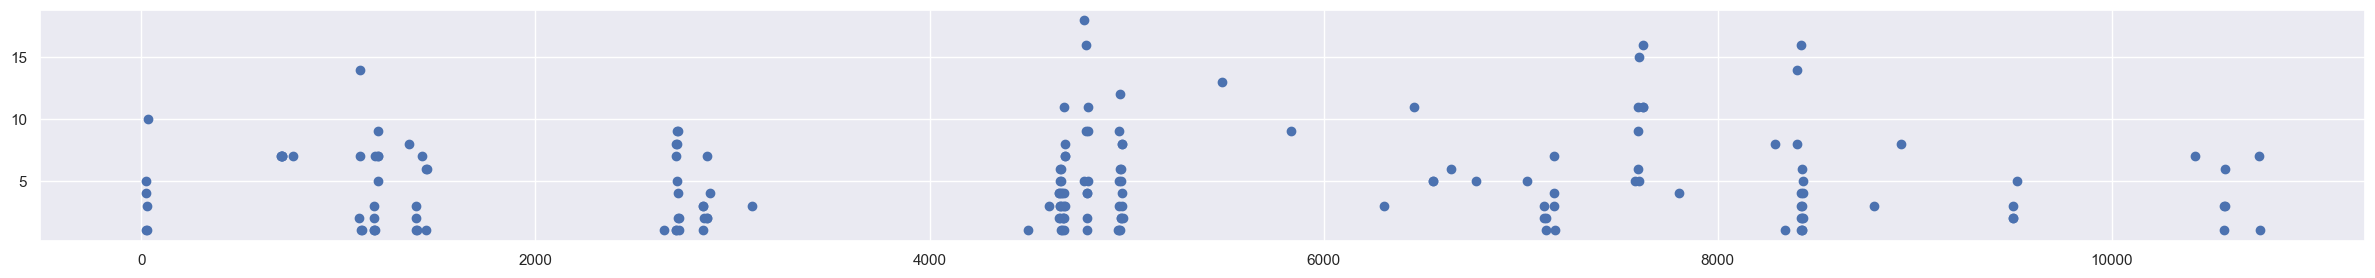

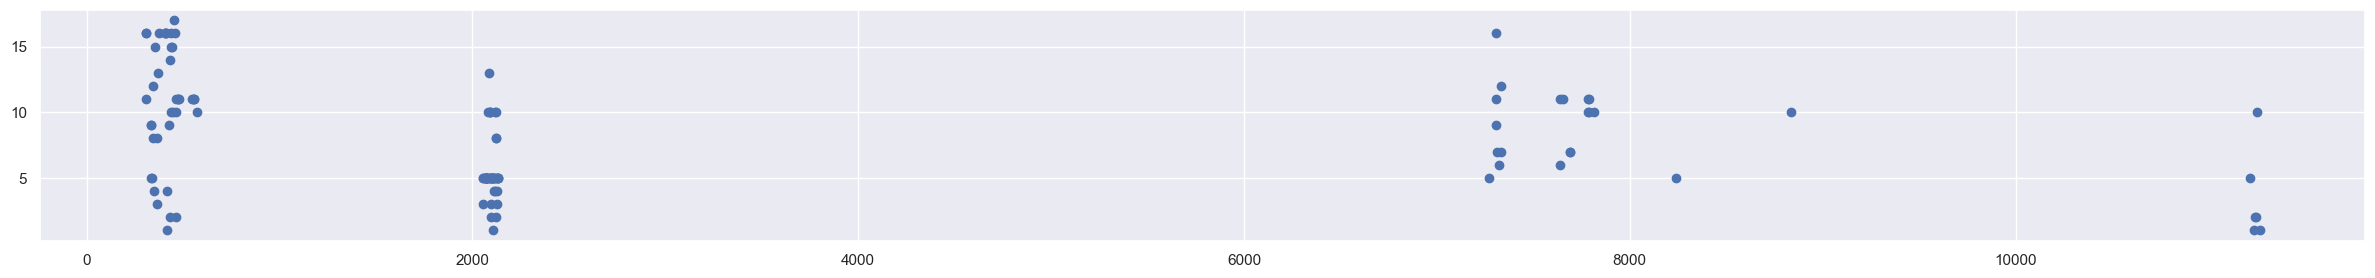

In [17]:
df_new = df[['userID', 'KnowledgeTag']]

for i in [0, 1, 2, 5, 6]:
    plt.figure(figsize=(30, 3))
    plt.scatter(df_new[df_new['userID']==i]['KnowledgeTag'].value_counts().index, df_new[df_new['userID']==i]['KnowledgeTag'].value_counts())

In [18]:
df_assess = df[['assessmentItemID', 'KnowledgeTag']]
len(set(df['assessmentItemID']))

9454

In [19]:
df_assess['assess_test'] = df_assess['assessmentItemID'].apply(lambda x: x[:7])
df_assess

,assessmentItemID,KnowledgeTag,assess_test
0,A060001001,7224,A060001
1,A060001002,7225,A060001
2,A060001003,7225,A060001
3,A060001004,7225,A060001
4,A060001005,7225,A060001
...,...,...,...
2266581,A030071005,438,A030071
2266582,A040165001,8836,A040165
2266583,A040165002,8836,A040165
2266584,A040165003,8836,A040165


In [20]:
test_list = sorted(list(set(df_assess['assess_test'])))[:10]
for i in test_list:
    print('-'*5, i, '-'*5)
    print(df_assess[df_assess['assess_test']==i]['KnowledgeTag'].value_counts().sort_index()/df_assess[df_assess['assess_test']==i]['assessmentItemID'].value_counts()[0])

----- A010001 -----
KnowledgeTag
5844    5.0
Name: count, dtype: float64
----- A010002 -----
KnowledgeTag
5844    3.0
6803    2.0
Name: count, dtype: float64
----- A010003 -----
KnowledgeTag
6307    1.0
6804    2.0
6806    2.0
Name: count, dtype: float64
----- A010004 -----
KnowledgeTag
5845    2.0
6804    1.0
6806    2.0
Name: count, dtype: float64
----- A010005 -----
KnowledgeTag
5846    1.0
6308    4.0
Name: count, dtype: float64
----- A010006 -----
KnowledgeTag
5846    1.0
6308    4.0
Name: count, dtype: float64
----- A010007 -----
KnowledgeTag
5814    5.0
Name: count, dtype: float64
----- A010008 -----
KnowledgeTag
5814    5.0
Name: count, dtype: float64
----- A010009 -----
KnowledgeTag
5485    5.0
Name: count, dtype: float64
----- A010010 -----
KnowledgeTag
5485    5.0
Name: count, dtype: float64


In [21]:
df_tag = pd.DataFrame({"assess_test":sorted(df_assess['assess_test'].unique())})
df_tag

,assess_test
0,A010001
1,A010002
2,A010003
3,A010004
4,A010005
...,...
1532,A090070
1533,A090071
1534,A090072
1535,A090073


In [22]:
for i in tqdm(range(df_tag.shape[0])):
    exp = df_assess[df_assess['assess_test']==df_tag.loc[i, 'assess_test']]['KnowledgeTag'].value_counts().sort_index()//df_assess[df_assess['assess_test']==df_tag.loc[i, 'assess_test']]['assessmentItemID'].value_counts()[0]
    list = []
    for j, k in zip(exp.index, exp):
        for m in range(k):
            list.append(j)
    df_tag.loc[i,'Tag'] = str(list)
    
df_tag

100%|███████████████████████████████████████████| 1537/1537 [04:24<00:00,  5.82it/s]


,assess_test,Tag
0,A010001,"[5844, 5844, 5844, 5844, 5844]"
1,A010002,"[5844, 5844, 5844, 6803, 6803]"
2,A010003,"[6307, 6804, 6804, 6806, 6806]"
3,A010004,"[5845, 5845, 6804, 6806, 6806]"
4,A010005,"[5846, 6308, 6308, 6308, 6308]"
...,...,...
1532,A090070,"[2647, 9925, 9925, 9926, 9929, 9929, 9929, 9929]"
1533,A090071,"[2644, 2647, 2647, 9924, 9924, 9926, 9929, 9929]"
1534,A090072,"[2648, 4243, 4243, 4243, 4243, 4243]"
1535,A090073,"[2648, 2648, 2648, 4243, 10196, 10196]"


In [23]:
df_tag['Tag'] = df_tag['Tag'].apply(lambda x: x.split('[')[1].split(']')[0].replace(' ',''))
df_tag

,assess_test,Tag
0,A010001,"5844,5844,5844,5844,5844"
1,A010002,"5844,5844,5844,6803,6803"
2,A010003,"6307,6804,6804,6806,6806"
3,A010004,"5845,5845,6804,6806,6806"
4,A010005,"5846,6308,6308,6308,6308"
...,...,...
1532,A090070,"2647,9925,9925,9926,9929,9929,9929,9929"
1533,A090071,"2644,2647,2647,9924,9924,9926,9929,9929"
1534,A090072,"2648,4243,4243,4243,4243,4243"
1535,A090073,"2648,2648,2648,4243,10196,10196"


In [24]:
df_tag['assess_test'] = df_tag['assess_test'].apply(lambda x: x[:4]+'000'+x[4:])
df_tag.rename(columns={'assess_test':'testId'}, inplace=True)

In [31]:
#df_tag.to_csv('./Tag.csv')

In [33]:
data = pd.read_csv('./Tag.csv')
data

,Unnamed: 0,testId,Tag
0,0,A010000001,"5844,5844,5844,5844,5844"
1,1,A010000002,"5844,5844,5844,6803,6803"
2,2,A010000003,"6307,6804,6804,6806,6806"
3,3,A010000004,"5845,5845,6804,6806,6806"
4,4,A010000005,"5846,6308,6308,6308,6308"
...,...,...,...
1532,1532,A090000070,"2647,9925,9925,9926,9929,9929,9929,9929"
1533,1533,A090000071,"2644,2647,2647,9924,9924,9926,9929,9929"
1534,1534,A090000072,"2648,4243,4243,4243,4243,4243"
1535,1535,A090000073,"2648,2648,2648,4243,10196,10196"


## Left Join 확인

In [26]:
df_left = pd.merge(df, df_tag, left_on='testId', right_on='testId', how='left')
df_left

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testId_group,Tag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,"7224,7225,7225,7225,7225,7225"
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,"7224,7225,7225,7225,7225,7225"
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,"7224,7225,7225,7225,7225,7225"
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,"7224,7225,7225,7225,7225,7225"
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,"7224,7225,7225,7225,7225,7225"
...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,"438,438,438,438,438"
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,"8836,8836,8836,8836"
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,"8836,8836,8836,8836"
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,"8836,8836,8836,8836"


In [27]:
df_left.isna().sum()

userID              0
assessmentItemID    0
testId              0
answerCode          0
Timestamp           0
KnowledgeTag        0
testId_group        0
Tag                 0
dtype: int64

In [28]:
# df_assess[df_assess['assess_test']=='A090074']['KnowledgeTag'].value_counts().sort_index()[2648]/df_assess[df_assess['assess_test']=='A090074']['assessmentItemID'].value_counts()[0]

2.0

In [29]:
# df_assess[df_assess['assess_test']=='A090074']['assessmentItemID'].value_counts()

assessmentItemID
A090074001    45
A090074004    45
A090074002    45
A090074003    45
A090074005    45
A090074006    45
Name: count, dtype: int64

###**콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.

